In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
url='https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/challenge2_dataset.csv'

In [29]:
url2='https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/challenge2_prediction.csv'

In [45]:
df=pd.read_csv(url)

In [46]:
df

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True
...,...,...,...,...
1990,0.80,0.30,22.0,False
1991,0.69,0.22,9.0,True
1992,0.66,0.24,15.0,False
1993,0.46,0.26,11.0,False


In [47]:
df.shape

(1995, 4)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
1         1992 non-null float64
2         1992 non-null float64
3         1993 non-null float64
Target    1984 non-null object
dtypes: float64(3), object(1)
memory usage: 62.5+ KB


In [49]:
df.describe()

,1,2,3
count,1992.000000,1992.000000,1993.000000
mean,1.488800,1.741546,16.333166
std,22.145983,58.456685,42.407440
min,0.400000,0.100000,0.000000
25%,0.490000,0.150000,12.000000
50%,0.600000,0.220000,15.000000
75%,0.710000,0.300000,19.000000
max,600.000000,2600.000000,1900.000000


In [50]:
## things noticed
#1 null values are present
#2 outliers are present

In [51]:
# we will deal with null values

In [52]:
df.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [53]:
df.dropna(axis=0,inplace=True)

In [54]:
df.isnull().sum() ## deleting all the null values since the number of values were less 5%

1         0
2         0
3         0
Target    0
dtype: int64

In [55]:
df.shape

(1977, 4)

In [56]:
df['Target']=df['Target'].map({True:1,False:0})

In [57]:
df

,1,2,3,Target
0,0.60,0.31,13.0,0
1,0.74,0.33,21.0,0
4,0.77,0.15,15.0,1
5,0.46,0.17,18.0,0
6,0.49,0.26,10.0,0
...,...,...,...,...
1990,0.80,0.30,22.0,0
1991,0.69,0.22,9.0,1
1992,0.66,0.24,15.0,0
1993,0.46,0.26,11.0,0


In [61]:
## now treating the outliers

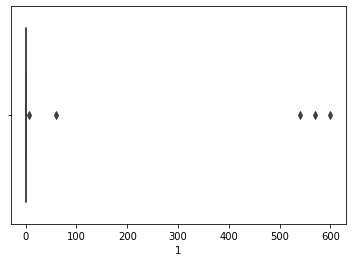

In [62]:
sns.boxplot(df['1'])

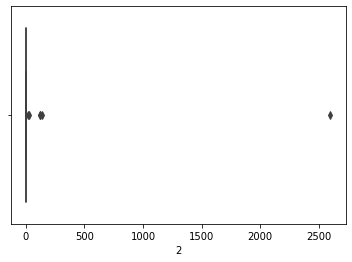

In [63]:
sns.boxplot(df['2'])

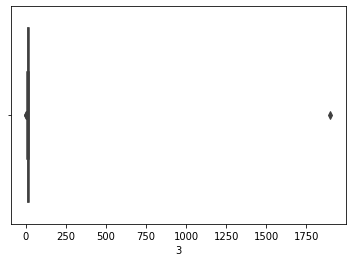

In [64]:
sns.boxplot(df['3'])

In [80]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

[[0.04030538 0.02459926 0.0782384  0.51937416]
 [0.03400591 0.02425834 0.10970488 0.51937416]
 [0.03265603 0.0273267  0.03125258 1.92539421]
 ...
 [0.03760561 0.02579252 0.03125258 0.51937416]
 [0.04660484 0.02545159 0.12522422 0.51937416]
 [0.04525496 0.02613345 0.14871714 0.51937416]]


In [81]:
df1=df[(z< 3)]
print(df1)

         1     2     3  Target
0     0.60  0.31  13.0       0
0     0.60  0.31  13.0       0
0     0.60  0.31  13.0       0
0     0.60  0.31  13.0       0
1     0.74  0.33  21.0       0
...    ...   ...   ...     ...
1993  0.46  0.26  11.0       0
1994  0.49  0.22  10.0       0
1994  0.49  0.22  10.0       0
1994  0.49  0.22  10.0       0
1994  0.49  0.22  10.0       0

[7903 rows x 4 columns]


In [84]:
## we have removed the ouliers

In [86]:
x=df1.drop('Target',axis=1)
y=df1['Target']

In [90]:
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,classification_report
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,PolynomialFeatures
from sklearn import model_selection
from sklearn.model_selection import KFold,GridSearchCV,train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [98]:
log=LogisticRegression()
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
bag_model=BaggingClassifier(n_estimators=31,random_state=0)
rf_model=RandomForestClassifier(n_estimators=33,criterion='entropy',random_state=0)
ada_model=AdaBoostClassifier(n_estimators=50,random_state=0)
grad_model=GradientBoostingClassifier(n_estimators=100,random_state=0)
ada_model2=AdaBoostClassifier(base_estimator=rf_model,n_estimators=50,random_state=100)

In [99]:
model=[]
model.append(('logistic',log))
model.append(('Decisiontree',dt_model))
model.append(('RandomForeset',rf_model))
model.append(('Bagging ',bag_model))
model.append(('adaboost normal ',ada_model))
model.append(('gradient',grad_model))

C:\Users\HIMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HIMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HIMA\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HIMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HIMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

logistic: 0.889033 (0.000387)
Decisiontree: 0.986443 (0.000006)
RandomForeset: 1.000000 (0.000000)
Bagging : 1.000000 (0.000000)
adaboost normal : 0.969428 (0.000025)
gradient: 0.998971 (0.000000)


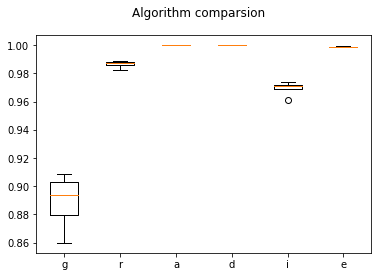

In [100]:
results=[]
names=[]
for name,models in model:
    kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_results=model_selection.cross_val_score(models,x,y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    # box plot
fig=plt.figure()
fig.suptitle('Algorithm comparsion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show()

In [101]:
## from the we select descision tree 

In [102]:
final_model= DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)

In [103]:
final_model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [110]:
y_pred=final_model.predict(df2)

In [105]:
df2=pd.read_csv(url2)

In [106]:
df2

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0
...,...,...,...
850,0.80,0.19,19.0
851,0.40,0.15,21.0
852,0.49,0.26,17.0
853,0.63,0.31,14.0


In [109]:
df2.dropna(inplace=True)

In [111]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,